#### Nesta oficina, você continuará a analisar o conjunto de dados dos passageiros do Titanic. Esse conjunto de dados é bastante famoso em ciência de dados, sendo disponibilizado diretamente pela biblioteca seaborn sem a necessidade de baixar os dados para a sua máquina. Portanto, crie um Jupyter Notebook, para responder às questões.

###### Importe as bibliotecas pandas, matplotlib e seaborn e use a palavra mágica inline, para exibir as visualizações no notebook. Depois, carregue os dados em um DataFrame. Os dados podem ser carregados pelo seaborn, utilizando a função load_dataset(‘titanic’);

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="dark")


df_titanic = sns.load_dataset("titanic")
df_titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


###### Crie uma visualização que mostre a distribuição do valor da passagem (“fare”), de acordo com a cidade na qual o passageiro embarcou ("embark_town"). Você pode escolher a técnica que julgar mais adequada;

In [82]:
# Avaliando quantos são os valores categóricos únicos para ver qual gráfico melhor se encaixa

df_titanic['embark_town'].unique()

array(['Southampton', 'Cherbourg', 'Queenstown', nan], dtype=object)

In [83]:
# Foram Identificados valores NaN?

NaN_Values = df_titanic['embark_town'].isna().sum()

if df_titanic.isnull().values.any() == True:
    print(f'Há {NaN_Values} valores NaN que devem ser tratados')
else:
    print('O Dataset não possuí valores NaN')

Há 2 valores NaN que devem ser tratados


In [91]:
# Sabemos que temos um total de 891 registros. Se limparmos os 2 NaN, devemos ficar com 889

df_titanic_fare = df_titanic[[ 'pclass','fare','embark_town']].dropna()
df_titanic_fare

SyntaxError: invalid syntax (<ipython-input-91-864678b94b99>, line 3)

Considerando o Alto volume de informações, vamos utilzar o gráfico de violino para identificar as proporções dos custos


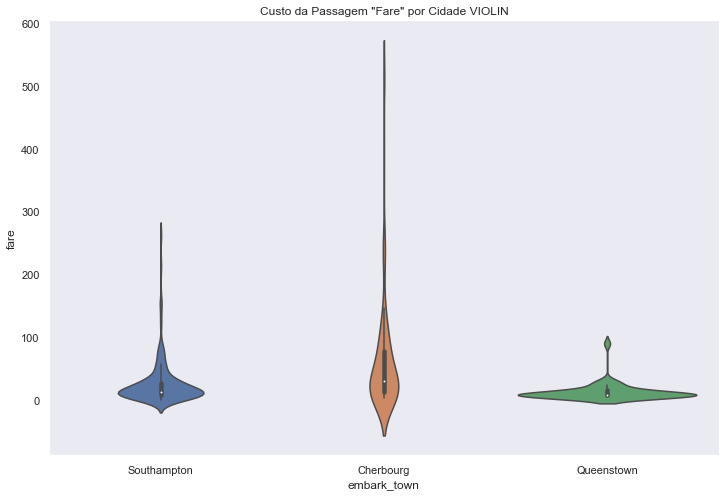

A visualização é prejudicada em função da dimensão dos "bigodes", dessa forma, vamos adotar um gráfico Boxplot


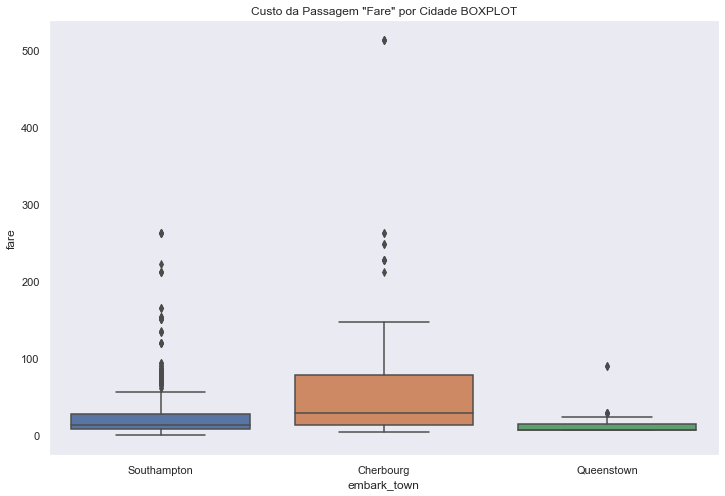

In [97]:
print('Considerando o Alto volume de informações, vamos utilzar o gráfico de violino para identificar as proporções dos custos') 

plt.figure(figsize=(12,8))
plt.title('Custo da Passagem "Fare" por Cidade VIOLIN')
sns.violinplot(x="embark_town", y="fare", data=df_titanic_fare)
plt.show()

print('A visualização é prejudicada em função da dimensão dos "bigodes", dessa forma, vamos adotar um gráfico Boxplot')

plt.figure(figsize=(12,8))
plt.title('Custo da Passagem "Fare" por Cidade BOXPLOT')
sns.boxplot(x="embark_town", y="fare", data=df_titanic_fare)
plt.show()

 A visualização ainda está prejudicada. E se avaliassemos uma distribuição pro cidade e por CLASSE?


C:\Users\A324150\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 20.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


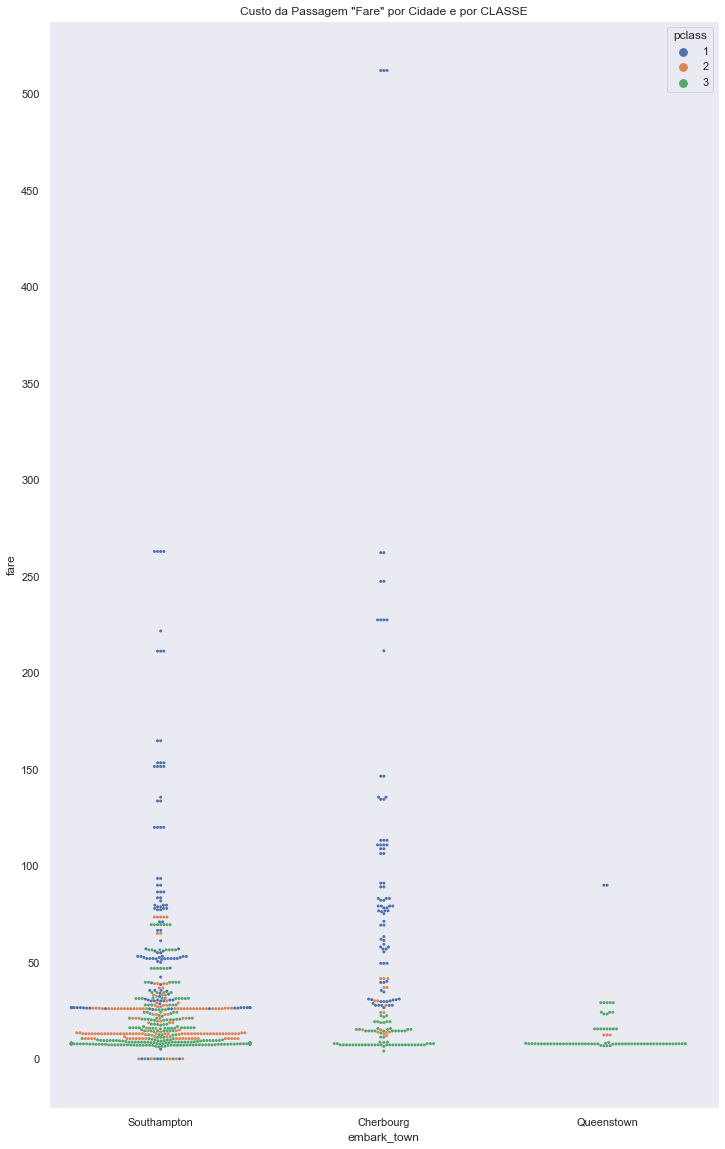


Podemos, agora, ter uma visão mais interessante da distribuição : A maior parte dos preços ficam entre 0 e 100 dólares, sendo que a partir de de 50 temos uma predominância da classe 2 e 1, se tornando praticamente homogênea para a primeira classe em 75.
 É interessante também notar a predominância da terceira classe em Queenstown, talvez em virtude de uma situação economia mais crítica de seus moradores da época


In [106]:
print(' A visualização ainda está prejudicada. E se avaliassemos uma distribuição pro cidade e por CLASSE?')

plt.figure(figsize=(12,20))
plt.title('Custo da Passagem "Fare" por Cidade e por CLASSE')
plt.yticks([0,50,100,150,200,250,300,350,400,450,500])
sns.swarmplot(x="embark_town", y="fare", hue='pclass', data=df_titanic, size=3)
plt.show()

print('\nPodemos, agora, ter uma visão mais interessante da distribuição : A maior parte dos preços ficam entre 0 e 100 dólares, sendo que a partir de de 50 temos uma predominância da classe 2 e 1, se tornando praticamente homogênea para a primeira classe em 75.\n É interessante também notar a predominância da terceira classe em Queenstown, talvez em virtude de uma situação economia mais crítica de seus moradores da época' )


###### Crie uma visualização que mostre as distribuições do valor da passagem, de acordo com a cidade de embarque, sexo e se o passageiro sobreviveu ou não. Você pode escolher a técnica que julgar mais adequada. Que diferença você consegue notar nas distribuições dos passageiros que sobreviveram em relação aos que não sobreviveram?


 Considerando o gráfico de distribuição em frequência, podemos verificar que a maior parte dos passageiros que infelizmente vieram a perder a vida tinham a passagem mais barata (Sendo assim, de uma classe mais baixa e como consequência alocados nos andares mais abaixo do navio - mesma altura onde o casco foi perfurado). o fenômeno pode ser avaliado nos "picos" de concentração próximos do valor 0


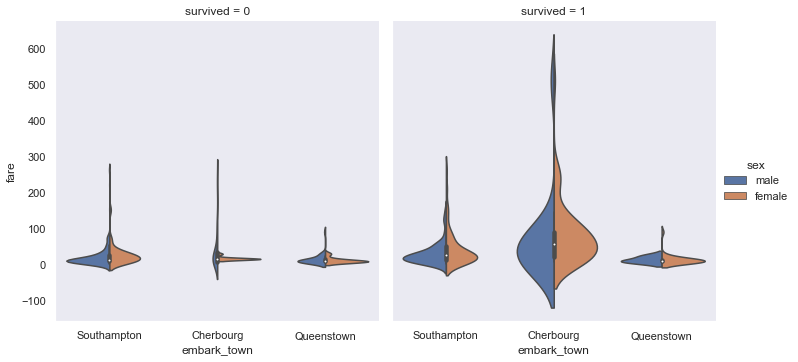

In [115]:
sns.catplot(x="embark_town", y="fare", hue = 'sex', col = 'survived', kind = 'violin',split=True, data=df_titanic)

print('\n Considerando o gráfico de distribuição em frequência, podemos verificar que a maior parte dos passageiros que infelizmente vieram a perder a vida tinham a passagem mais barata (Sendo assim, de uma classe mais baixa e como consequência alocados nos andares mais abaixo do navio - mesma altura onde o casco foi perfurado). o fenômeno pode ser avaliado nos "picos" de concentração próximos do valor 0')